# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


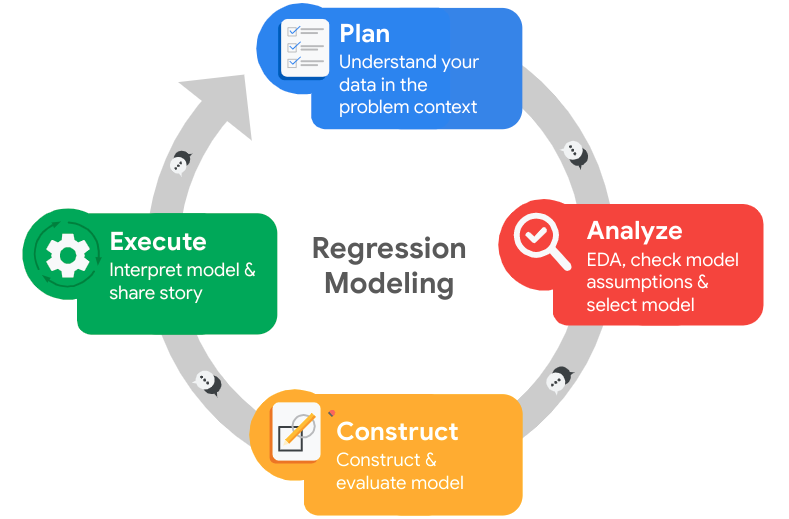

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




The stakeholders for this project is the leadership team for Salifort Motors. We are trying to find the reasons for employee turnover and provide insight to the leadership team as to what can be improved to prevent the high turnover rate. Having look at the data, there do not seem to be any missing values or any outliers and the data seems to be clean.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
### YOUR CODE HERE ### 

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")
df0.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [6]:
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [7]:
### YOUR CODE HERE ###
duplicates = df0[df0.duplicated()]

In [8]:
### YOUR CODE HERE ###
duplicates

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


There does not seem to be any duplicates, most of them are for the number of projects, time spent in the company, work accident, promotion but they still seem to be genuine entries

### Check outliers

Check for outliers in the data.

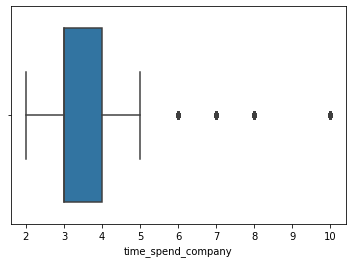

In [9]:
### YOUR CODE HERE ###

sns.boxplot(df0['time_spend_company'])

In [10]:
#Number of rows containing the outliers
### YOUR CODE HERE ###
threshold = df0['time_spend_company'].quantile(0.75)
outliers = df0[df0['time_spend_company'] > threshold ]
outliers

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
12,0.84,0.92,4,234,5,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14983,0.72,0.84,5,257,5,0,1,0,technical,medium
14985,0.91,0.99,5,254,5,0,1,0,technical,medium
14986,0.85,0.85,4,247,6,0,1,0,technical,low
14990,0.89,0.88,5,228,5,1,1,0,support,low


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




With the EDA analysis, I discovered a clear relationship between the departments and the salaries. Management department has significant high salaries than the rest. With the scatterplot between the time spend in the company and the satisfaction level, hgihlighted by the turnover rate, we noticed that employees who have been with the company more than 6 years have not left the company. With the comparision between the number of projects and the average monthly hours, we noticed that the employees spending more hours and more projects tend to leave the company than the employess spending less hours. This might be related to work-life balance. Additionally with the boxplot, we noticed that most of the employees that left were from the department other than Management, HR, Accounting, RandD and Marketing. Further visualization on the salary provided us the insight that employees that left were mostly with the low salary and there is significant less turnover rate for the employees that were paid more. 

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [11]:
#numbers of people who left vs. stayed
### YOUR CODE HERE ###
df0['left'].value_counts()
#percentages of people who left vs. stayed
### YOUR CODE HERE ###
df0['left'].value_counts(normalize = True)


0    0.761917
1    0.238083
Name: left, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

Text(0.5, 1.0, 'Comparision between time spend in the company and satisfaction level')

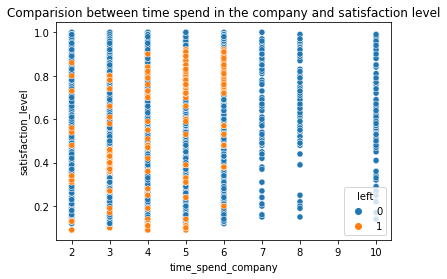

In [12]:
### YOUR CODE HERE ###
sns.scatterplot(x = df0['time_spend_company'], y = df0['satisfaction_level'], hue = df0['left'])
plt.title("Comparision between time spend in the company and satisfaction level")

In [13]:
df = df0.copy()
df['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [14]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [15]:
df['Department2'] = df['Department'].map({'sales' : 1, 'technical' : 2, 'support' : 3, 'IT' : 4, 'product_mng' : 5, 'marketing' : 6, 'RandD' : 7, 'accounting' : 8, 'hr' : 9, 'management': 10})
df['salary2'] = df['salary'].map({'low': 1, "medium": 2, 'high' : 3})

[]

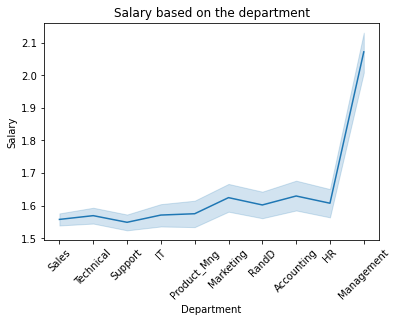

In [16]:
### YOUR CODE HERE ###
sns.lineplot(x = df['Department2'], y = df['salary2'])
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['Sales', 'Technical', 'Support', 'IT', "Product_Mng", "Marketing", 'RandD', "Accounting", 'HR', 'Management'], rotation = 45)
plt.title("Salary based on the department")
plt.xlabel("Department")
plt.ylabel("Salary")
plt.plot()

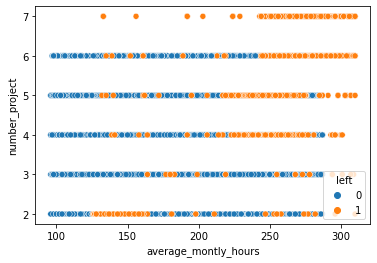

In [17]:
sns.scatterplot(x = df['average_montly_hours'], y = df['number_project'], hue = df['left'])

[]

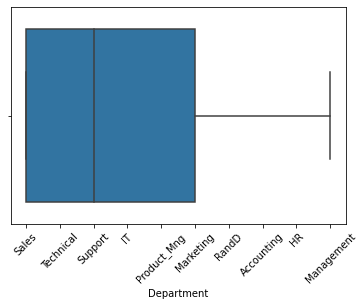

In [18]:
### YOUR CODE HERE ###
sns.boxplot(x = df['Department2'], hue = df['left'])
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['Sales', 'Technical', 'Support', 'IT', "Product_Mng", "Marketing", 'RandD', "Accounting", 'HR', 'Management'], rotation = 45)
plt.xlabel("Department")
plt.plot()

Text(0.5, 0, 'Salary')

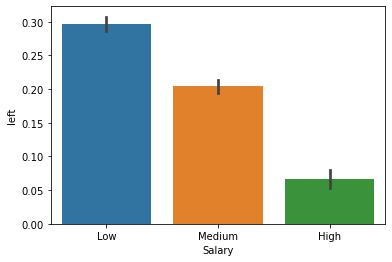

In [19]:
### YOUR CODE HERE ###
sns.barplot(x = df['salary2'], y = df['left'])
plt.xticks([0, 1, 2], ['Low', 'Medium', 'High'])
plt.xlabel("Salary")

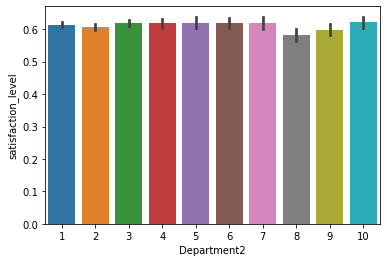

In [20]:
### YOUR CODE HERE ###
sns.barplot(x = df['Department2'], y = df['satisfaction_level'])

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df['average_montly_hours'] = scaler.fit_transform(df[['average_montly_hours']])

In [22]:
df['average_montly_hours'].describe()

count    14999.000000
mean         0.490889
std          0.233379
min          0.000000
25%          0.280374
50%          0.485981
75%          0.696262
max          1.000000
Name: average_montly_hours, dtype: float64

### Insights

With the EDA analysis, I discovered a clear relationship between the departments and the salaries. Management department has significant high salaries than the rest. With the scatterplot between the time spend in the company and the satisfaction level, hgihlighted by the turnover rate, we noticed that employees who have been with the company more than 6 years have not left the company. With the comparision between the number of projects and the average monthly hours, we noticed that the employees spending more hours and more projects tend to leave the company than the employess spending less hours. This might be related to work-life balance. Additionally with the boxplot, we noticed that most of the employees that left were from the department other than Management, HR, Accounting, RandD and Marketing. Further visualization on the salary provided us the insight that employees that left were mostly with the low salary and there is significant less turnover rate for the employees that were paid more. 

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


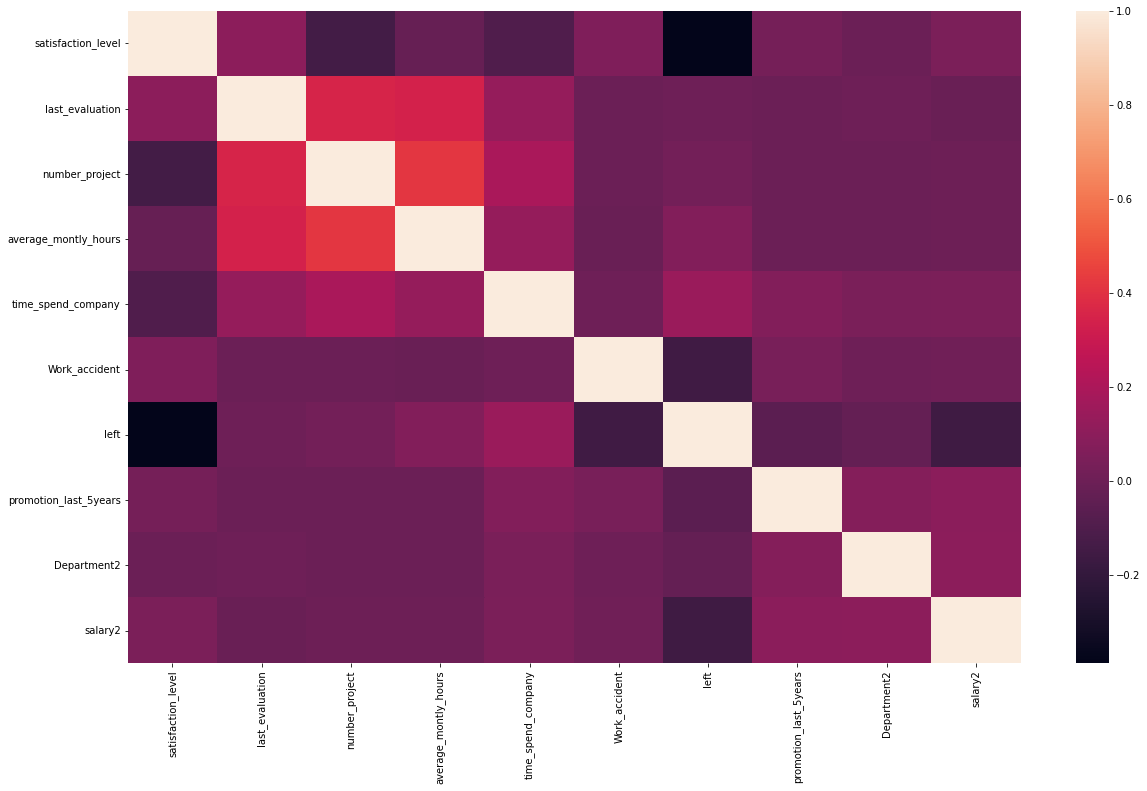

In [23]:
#Finding correlation among the variables
plt.figure(figsize = (20,12))
sns.heatmap(df.corr())

##### We will take out the satisfaction_level since it has correlation with the other and all the other factors contribute to it 

In [24]:
x = df.drop(columns = ['left', 'salary', 'Department', 'satisfaction_level'])
y = df['left']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, stratify = y, random_state = 42)

In [25]:
%%time
#Logistic Regression Model
logmodel = LogisticRegression(max_iter = 1000)
logmodel.fit(x_train, y_train)

CPU times: user 3.98 s, sys: 4.91 s, total: 8.89 s
Wall time: 4.4 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
#Helper fucntion to compare the scores of all the models used 
def get_score(model , y_pred, y_test):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    table = pd.DataFrame({"Model" : [model], 
                         "F1" : [f1], 
                         "Accuracy" : [accuracy], 
                         "Recall" : [recall], 
                         "Precision" : [precision]})
    return table

In [27]:
y_pred = logmodel.predict(x_test)
results = get_score("Logistic Regression", y_pred, y_test)
results

,Model,F1,Accuracy,Recall,Precision
0,Logistic Regression,0.017903,0.744,0.009804,0.102941


In [28]:
#Random Forest Classifier
rf = RandomForestClassifier(random_state = 42)
cv_params = {"max_depth" : [2, 4, 6, 10, None],
            "min_samples_leaf": [2, 10], 
            "min_samples_split" : [2, 10], 
            "n_estimators": [100, 200, 300], 
            "max_features" : ['sqrt', 'log2']}
scoring = ['accuracy', 'recall', 'f1', 'precision']
rf_gd = GridSearchCV(rf, cv_params, scoring = scoring, cv = 5, refit = 'f1')


In [29]:
%%time
rf_gd.fit(x_train, y_train)

CPU times: user 8min 21s, sys: 1.51 s, total: 8min 22s
Wall time: 8min 22s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [30]:
rf_gd.best_score_

0.9511843264517612

In [31]:
rf_gd.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [32]:
y_pred = rf_gd.best_estimator_.predict(x_test)

In [33]:
y_pred = rf_gd.best_estimator_.predict(x_test)
results = pd.concat([results , get_score("Random Forest", y_pred, y_test)])
results

,Model,F1,Accuracy,Recall,Precision
0,Logistic Regression,0.017903,0.744,0.009804,0.102941
0,Random Forest,0.961810,0.982,0.952381,0.971429


In [34]:
#XGBoost 
xgb = XGBClassifier(objective = 'binary:logistic')
cv_params = {'max_depth': [None],
                         'min_child_weight': [2],
                         'learning_rate' : [0.1],
                         'n_estimators': [100]}
xgb_gd = GridSearchCV(xgb, cv_params, scoring = scoring, refit = 'f1', cv = 5)

In [35]:
%%time
xgb_gd.fit(x_train, y_train)

CPU times: user 16min 56s, sys: 610 ms, total: 16min 57s
Wall time: 8min 29s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     predictor=None, random_state=None,
                

In [36]:
y_pred = xgb_gd.best_estimator_.predict(x_test)
results = pd.concat([results , get_score("XGBoost", y_pred, y_test)])
results

,Model,F1,Accuracy,Recall,Precision
0,Logistic Regression,0.017903,0.744000,0.009804,0.102941
0,Random Forest,0.961810,0.982000,0.952381,0.971429
0,XGBoost,0.941260,0.972333,0.931373,0.951359


In [37]:
features = rf_gd.best_estimator_.feature_importances_
names = x_train.columns
features_df = pd.DataFrame({'Feature': names,
                           'Importance': features}).sort_values(by = 'Importance', ascending = True)
features_df

,Feature,Importance
5,promotion_last_5years,0.001175
4,Work_accident,0.009567
7,salary2,0.013492
6,Department2,0.017278
0,last_evaluation,0.192019
3,time_spend_company,0.224464
2,average_montly_hours,0.255454
1,number_project,0.286552


<BarContainer object of 8 artists>

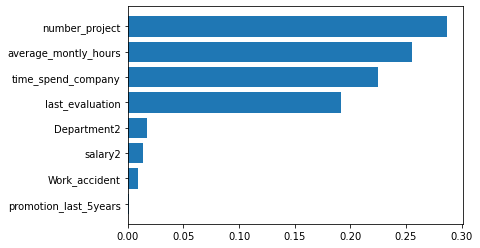

In [38]:
#Strong predictors for the target variable 
plt.barh(features_df['Feature'], features_df['Importance'])

💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Within the construct stage, after noticing the strong variables for the target variable, we noticed that there were more underlying important variables that contributed more to the turnover rate than the obvious ones we predicted during the analysis. The model we chose at the end was the Random Forest Classifier since the scores for it were very high and makes it a great model. According to the model the strong predictors were time spend in the company, number of projects, average monthly hours, last evaluation score. 

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



In [39]:
y_pred = rf_gd.best_estimator_.predict(x_test)
cm = confusion_matrix(y_pred, y_test)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf_gd.classes_)

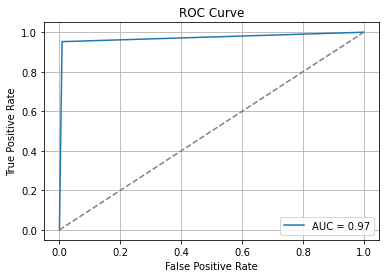

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

Based on the model we have chosen, the keys factors in turnover rate are satisfaction level, time spend in the company, number of projects, average monthly hours, last evaluation score. According to the model, we would recommend the business to help increase the satisfaction level of the employees. We would also recommend helping the employees to create a work life balance where they are not given too many projects or they are not spending a lot hours on the job. 

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Conclusion, Recommendations, Next Steps

Conclusion:
The analysis reveals clear trends and patterns behind employee turnover at Salifort Motors. Dissatisfaction, long working hours, high workload, and a lack of recent promotions contribute to employees choosing to leave the company.

Recommendations:

Improve Employee Satisfaction:
Regular surveys and feedback mechanisms can help identify and resolve dissatisfaction early.

Monitor Workload:
Employees managing a high number of projects or working excessive hours are at higher risk of leaving. Implementing workload-balancing tools or rotation policies may help reduce burnout.

Career Development Opportunities:
Offering more frequent promotions or training opportunities could increase retention.

Data-Driven HR Strategy:
HR should continue using predictive models to identify at-risk employees and proactively intervene.